# First Data Visualisation

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


## Visualise Apple 2023

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632523  129.395510  122.742865  128.782641  112117500
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600
2023-01-05  123.583084  126.301477  123.326078  125.668834   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800


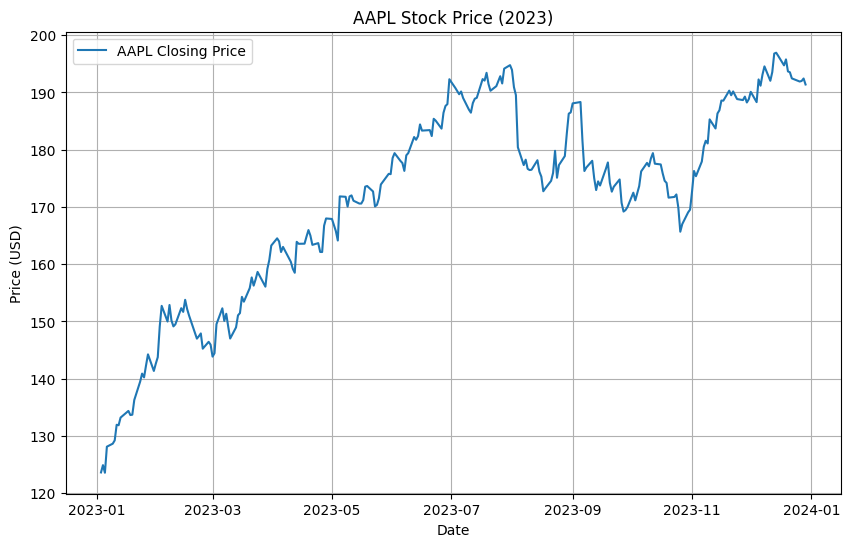

In [6]:

aapl = yf.download("AAPL", start="2023-01-01", end="2024-01-01")

print(aapl.head())

plt.figure(figsize=(10, 6))
plt.plot(aapl.index, aapl["Close"], label="AAPL Closing Price")
plt.title("AAPL Stock Price (2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

## Apple vs Microsoft w/ moving avgs

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume SMA_20  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                           
2023-01-03  123.632523  129.395510  122.742865  128.782641  112117500    NaN   
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600    NaN   

Price      SMA_50  
Ticker             
Date               
2023-01-03    NaN  
2023-01-04    NaN  
Price            Close       High         Low        Open    Volume SMA_20  \
Ticker            MSFT       MSFT        MSFT        MSFT      MSFT          
Date                                                                         
2023-01-03  235.240021  241.29825  233.099504  238.676618  25740000    NaN   
2023-01-04  224.949844  228.65154  221.866726  228.072231  50623400    NaN   

Price      SMA_50  
Ticker             
Date               
2023-01-03    NaN  
2023-01-04    NaN  


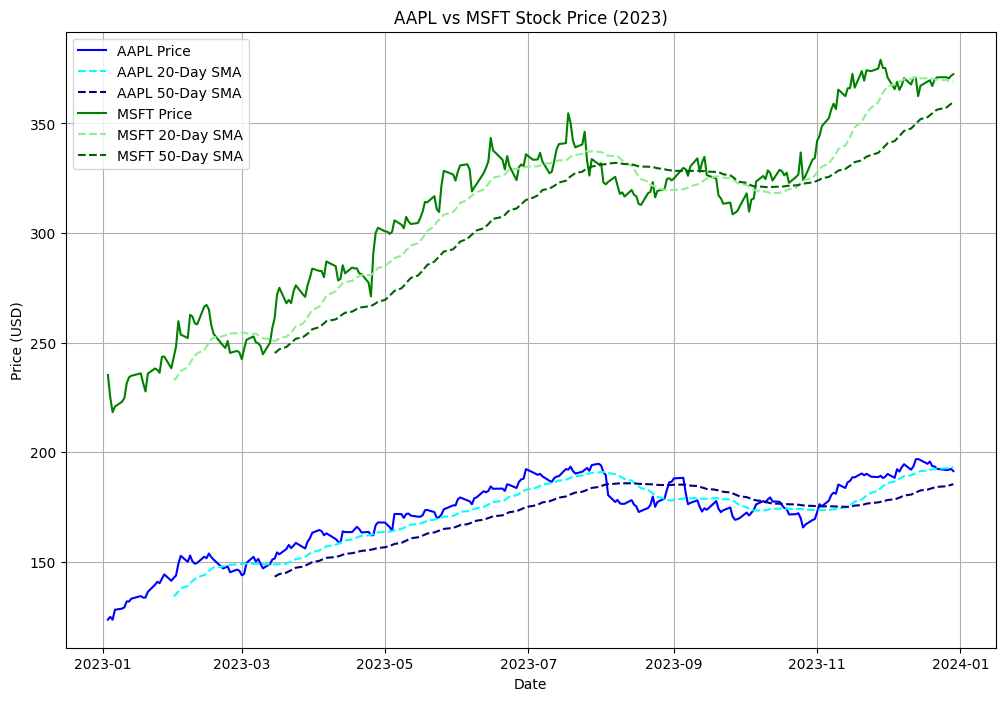

In [8]:
aapl = yf.download("AAPL", start="2023-01-01", end="2024-01-01") # returns a pandas dataframe, like a table. a day = a row
msft = yf.download("MSFT", start="2023-01-01", end="2024-01-01")

aapl["SMA_20"] = aapl["Close"].rolling(window=20).mean() #new column in data frame, the mean of the last 20 closing prices
aapl["SMA_50"] = aapl["Close"].rolling(window=50).mean() # sma is simple moving average
msft["SMA_20"] = msft["Close"].rolling(window=20).mean()
msft["SMA_50"] = msft["Close"].rolling(window=50).mean()

print(aapl.head(2))
print(msft.head(2))

plt.figure(figsize=(12, 8))
plt.plot(aapl.index, aapl["Close"], label="AAPL Price", color="blue")
plt.plot(aapl.index, aapl["SMA_20"], label="AAPL 20-Day SMA", linestyle="--", color="cyan")
plt.plot(aapl.index, aapl["SMA_50"], label="AAPL 50-Day SMA", linestyle="--", color="navy")

plt.plot(msft.index, msft["Close"], label="MSFT Price", color="green")
plt.plot(msft.index, msft["SMA_20"], label="MSFT 20-Day SMA", linestyle="--", color="lightgreen")
plt.plot(msft.index, msft["SMA_50"], label="MSFT 50-Day SMA", linestyle="--", color="darkgreen")

plt.title("AAPL vs MSFT Stock Price (2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

## Contrasting Apple's SMA with its EMA (Exponential Moving Average)

[*********************100%***********************]  1 of 1 completed


Price            Close        High        Low        Open     Volume SMA_20  \
Ticker            AAPL        AAPL       AAPL        AAPL       AAPL          
Date                                                                          
2023-01-03  123.632538  129.395526  122.74288  128.782657  112117500    NaN   
2023-01-04  124.907707  127.181276  123.64242  125.431615   89113600    NaN   

Price      SMA_50      EMA_20      EMA_50  
Ticker                                     
Date                                       
2023-01-03    NaN  123.632538  123.632538  
2023-01-04    NaN  123.753983  123.682544  


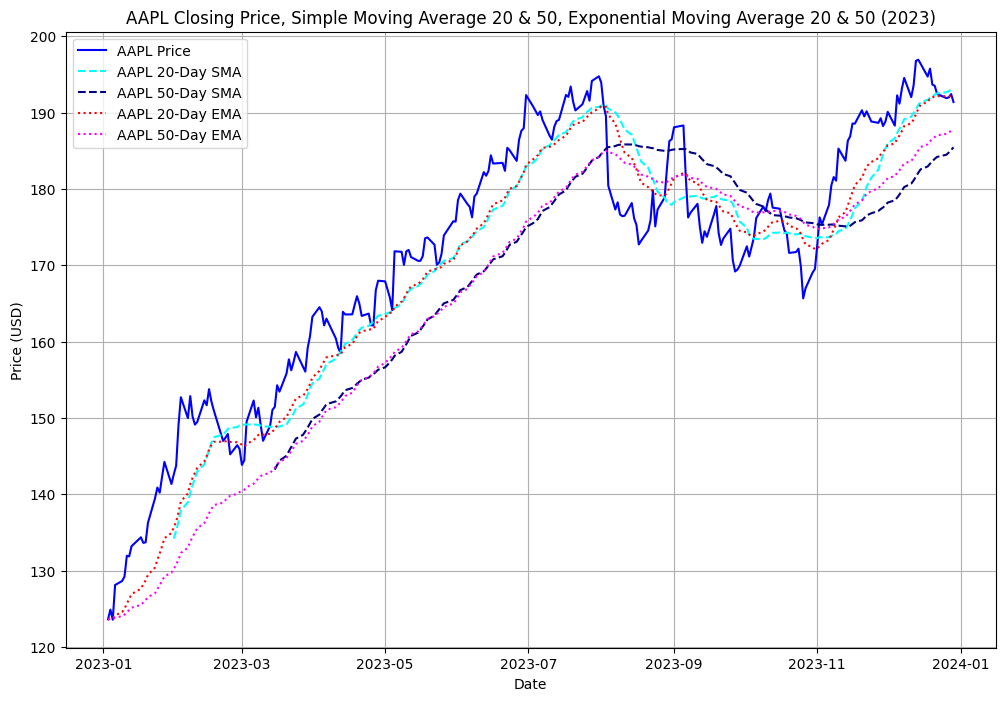

In [5]:
aapl = yf.download("AAPL", start="2023-01-01", end="2024-01-01")

aapl["SMA_20"] = aapl["Close"].rolling(window=20).mean() #new column in data frame, the mean of the last 20 closing prices
aapl["SMA_50"] = aapl["Close"].rolling(window=50).mean() # sma is simple moving average
aapl["EMA_20"] = aapl["Close"].ewm(span=20, adjust=False).mean()
aapl["EMA_50"] = aapl["Close"].ewm(span=50, adjust=False).mean()

print(aapl.head(2))

plt.figure(figsize=(12, 8))
plt.plot(aapl.index, aapl["Close"], label="AAPL Price", color="blue")
plt.plot(aapl.index, aapl["SMA_20"], label="AAPL 20-Day SMA", linestyle="--", color="cyan")
plt.plot(aapl.index, aapl["SMA_50"], label="AAPL 50-Day SMA", linestyle="--", color="navy")
plt.plot(aapl.index, aapl["EMA_20"], label="AAPL 20-Day EMA", linestyle=":", color="red")
plt.plot(aapl.index, aapl["EMA_50"], label="AAPL 50-Day EMA", linestyle=":", color="magenta")

plt.title("AAPL Closing Price, Simple Moving Average 20 & 50, Exponential Moving Average 20 & 50 (2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
